<a href="https://colab.research.google.com/github/nygeiger/Sketch-to-Pic/blob/main/Pic_to_Sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4422 Computer Vision
## Project Notebook
### *** Nyles Geiger ***

Goals:
- If possible add "wobble" effect to make generated sketches look more realistic
- Clean up code
- Pick 2,4,&6 images to return to have varying sketches of detail per image

In [ ]:
import numpy as np
import imageio

import matplotlib.pyplot as plt
import cv2
import os
import shutil

In [ ]:
# Download and unzip hw04_puzzle_pieces.zip file.
# Should create 3 folders.
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1ws6At5X1M9pntGz4G_f6Av-ULkJPi9ZO', dest_path='/content/CATS')

In [ ]:
## dumnbd_sketches(): Continue sketching and 'dumb down' 
##                    image by reducing detail
# img_name: the name of the image to be sketched
# levels: How many times the img should be blurred and sketched
# dwnld: if the sketches should be paired into a folder to be downloaded
def dumnbd_sketches(img, level, img_name, dwnld=False):
  if(level):
    # Blur Image
    blur_img=cv2.GaussianBlur(img, (31,31),0)


    #Sketch the image
    sketch_img=cv2.divide(img,blur_img, scale=256.0)


    ## Pair together the original with every 2, 4, 6 sketch
    if (level % 2 == 0):
      original_img = cv2.imread(img_name)
      original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
      original_img = cv2.resize(original_img, (256,256))


      sketch_img_3d = cv2.cvtColor(sketch_img, cv2.COLOR_GRAY2RGB)
      sketch_img_3d = cv2.resize(sketch_img_3d, (256,256))

      stitched_img = np.concatenate((original_img, sketch_img_3d), axis=1)

      print("Stitched Image")
      plt.imshow(stitched_img, cmap='gray')
      plt.colorbar()
      plt.show()

      if (dwnld):
        file_name = img_name[img_name.index("/")+1:img_name.index(".")]
        img_path = working_directory + '/' +file_name + "_" + str(level) + ".jpg"
        cv2.imwrite(img_path, stitched_img)

    dumnbd_sketches(sketch_img, level-1, img_name, dwnld)

In [ ]:
## to_sketch(): Start sketching process for each image
# img_name: the name of the image to be sketched
# levels: How many times the img should be blurred and sketched
# dwnld: if the sketches should be paired into a folder to be downloaded
def to_sketch(img_name, levels, dwnld=False):

  img = cv2.imread(img_name)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  print("Original Image")
  plt.imshow(img)
  plt.show()
  img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

  # Invert image
  invert_img=cv2.bitwise_not(img_gray)

  # Blur Image
  blur_img=cv2.GaussianBlur(invert_img, (31,31),0)

  # Invert Blurred Image
  invblur_img=cv2.bitwise_not(blur_img)

  #Sketch the image
  sketch_img=cv2.divide(img_gray,invblur_img, scale=256.0)

  print("Sketched Image")
  plt.imshow(sketch_img, cmap='gray')
  plt.colorbar()
  plt.show()

  dumnbd_sketches(sketch_img, levels-1, img_name, dwnld)

In [ ]:
## read_in_images(): reads in image from a folder in the jupyter file system
# folder: the name of the folder to read from
def read_in_images(folder):
  img_list = []
  dir_list = os.listdir(("{}").format(folder))
  for img_name in dir_list:
    img_list.append(("{}/{}").format(folder, img_name))
  return  img_list

Original Image


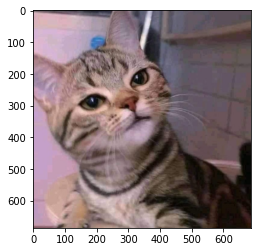

Sketched Image


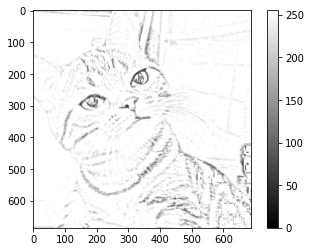

Stitched Image


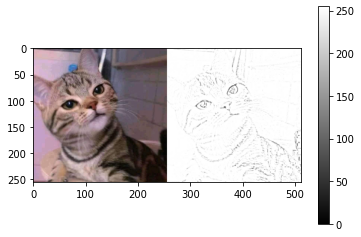

Stitched Image


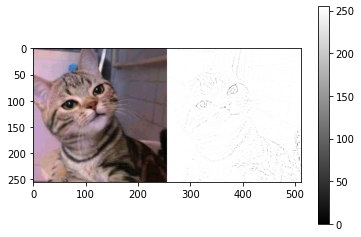

Stitched Image


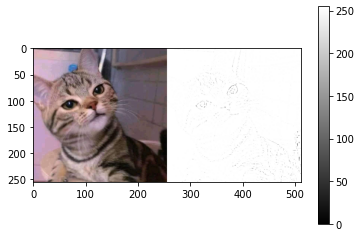

Original Image


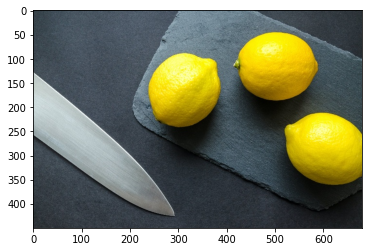

Sketched Image


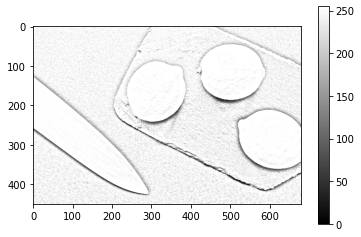

Stitched Image


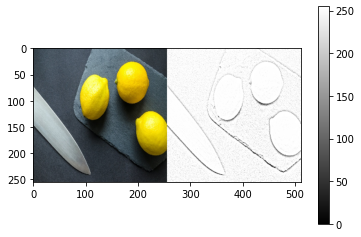

Stitched Image


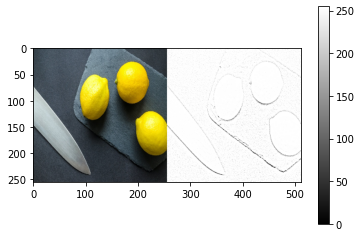

Stitched Image


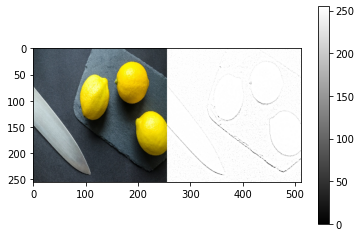

Original Image


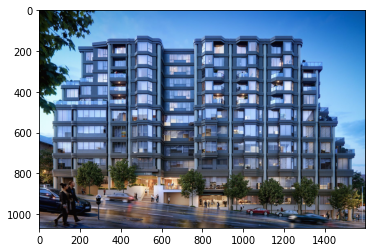

Sketched Image


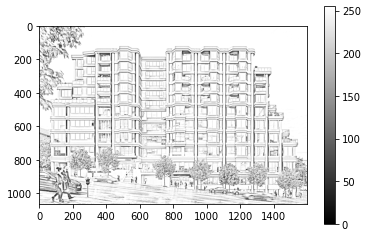

Stitched Image


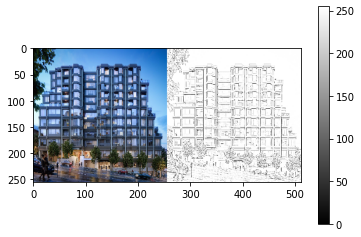

Stitched Image


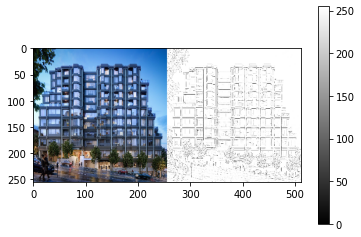

Stitched Image


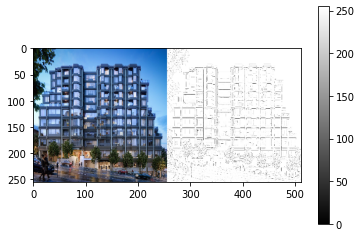

Original Image


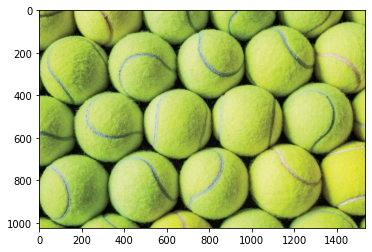

Sketched Image


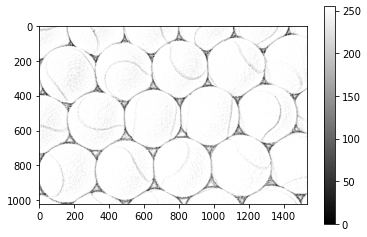

Stitched Image


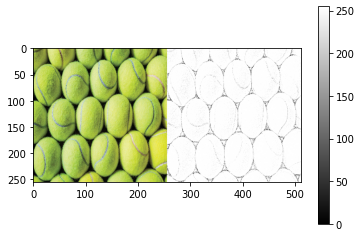

Stitched Image


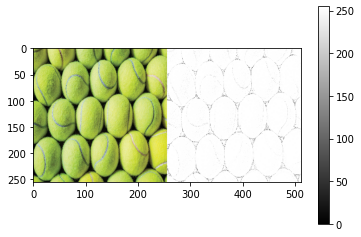

Stitched Image


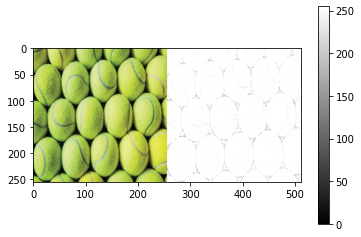

Original Image


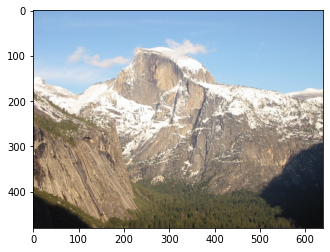

Sketched Image


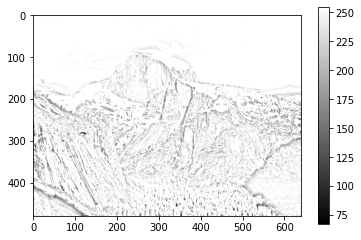

Stitched Image


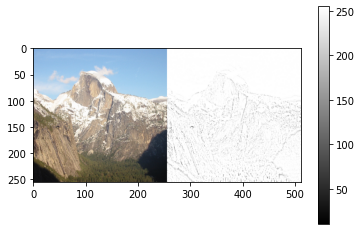

Stitched Image


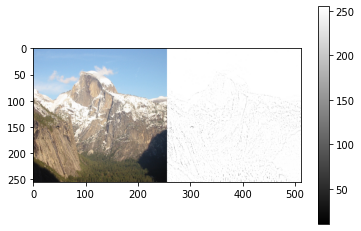

Stitched Image


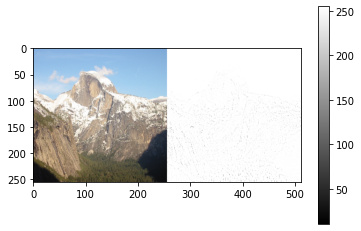

Original Image


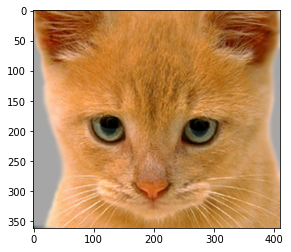

Sketched Image


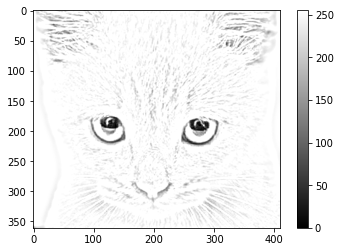

Stitched Image


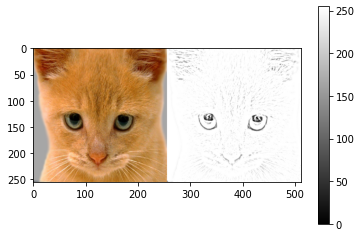

Stitched Image


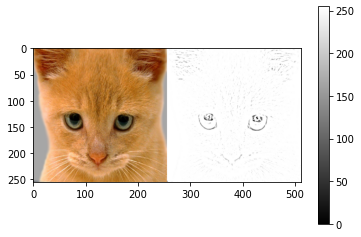

Stitched Image


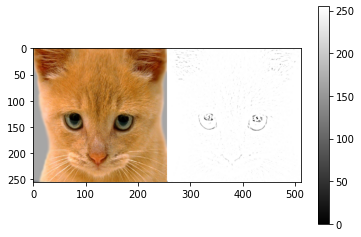

Original Image


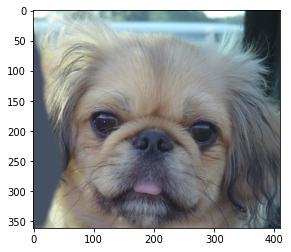

Sketched Image


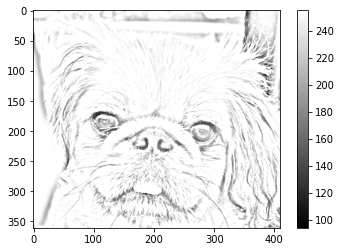

Stitched Image


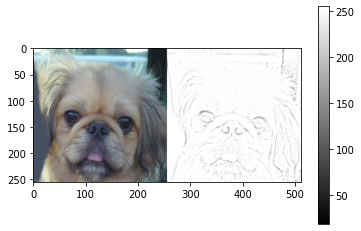

Stitched Image


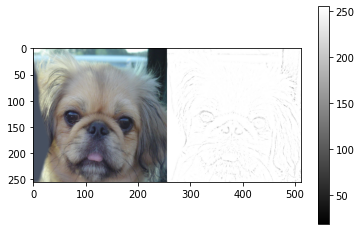

Stitched Image


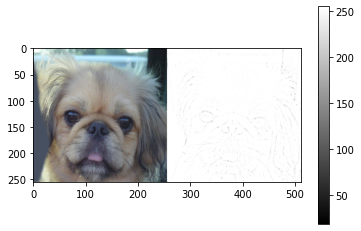

Original Image


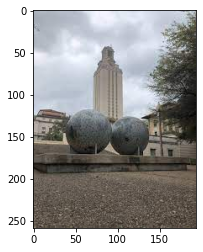

Sketched Image


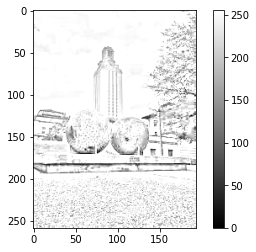

Stitched Image


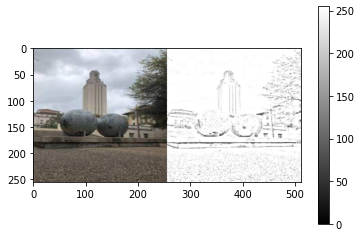

Stitched Image


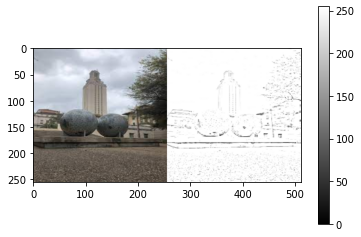

Stitched Image


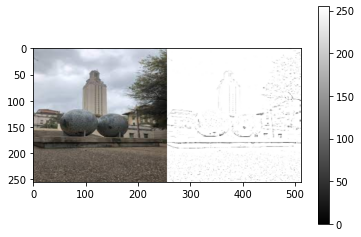

In [ ]:
working_directory = os.getcwd() + "/Pairs"
img_list = read_in_images("Images")
for img in img_list:
  to_sketch(img, 7)

In [ ]:
working_directory = os.getcwd() + "/CATS_PAIRS"

cat_img_list = read_in_images("CATS")
for img_idx in range(10):
  img = cat_img_list[img_idx]
  to_sketch(img, 7)

In [ ]:
shutil.make_archive("CATS_PAIRS", 'zip', working_directory)